# build a data science model that explains how these factors impacted home prices over the last 20 years. 

## Use the S&P Case-Schiller Home Price Index as a proxy for home prices: 

###  fred.stlouisfed.org/series/CSUSHPISA.

## Definitions 

A national factor is one that impacts home prices nationally.

For example: The US unemployment rate is a national factor, Boston's unemployment rate is NOT a national factor , Avg. no of bedrooms in California is not a national factor

A demand factor is one that primarily impacts demand for homes from consumers, (Ex. Unemployment rate)

A supply factor is one that primarily impacts the supply of homes (ie. total homes available for sale) (Ex. Availability of land)

In [1]:
import pandas as pd

In [2]:
price = pd.read_csv('CSUSHPISA.csv')

In [3]:
price

,DATE,CSUSHPISA
0,2003-06-01,132.649
1,2003-07-01,133.777
2,2003-08-01,134.968
3,2003-09-01,136.294
4,2003-10-01,137.532
...,...,...
236,2023-02-01,296.958
237,2023-03-01,298.210
238,2023-04-01,300.214
239,2023-05-01,302.657


In [4]:
# Unemployment Rate - Job Losers (U-2) (U2RATE)

unemp_rate = pd.read_csv('U2RATE.csv')

In [5]:
unemp_rate

,DATE,U2RATE
0,2003-08-01,3.4
1,2003-09-01,3.4
2,2003-10-01,3.3
3,2003-11-01,3.2
4,2003-12-01,3.1
...,...,...
236,2023-04-01,1.6
237,2023-05-01,1.8
238,2023-06-01,1.7
239,2023-07-01,1.6


In [6]:
#New Houses for Sale by Stage of Construction, Not Started

constr_not_start = pd.read_csv('NHFSEPNTS.csv')

In [7]:
constr_not_start

,DATE,NHFSEPNTS
0,2008-01-01,69.0
1,2008-02-01,67.0
2,2008-03-01,65.0
3,2008-04-01,62.0
4,2008-05-01,61.0
...,...,...
182,2023-03-01,90.0
183,2023-04-01,93.0
184,2023-05-01,94.0
185,2023-06-01,97.0


In [8]:
#New Houses for Sale by Stage of Construction, Under Construction
undr_constrtn = pd.read_csv('NHFSEPUCS.csv')

In [9]:
undr_constrtn

,DATE,NHFSEPUCS
0,2003-07-01,212.0
1,2003-08-01,214.0
2,2003-09-01,218.0
3,2003-10-01,222.0
4,2003-11-01,232.0
...,...,...
236,2023-03-01,273.0
237,2023-04-01,267.0
238,2023-05-01,266.0
239,2023-06-01,262.0


In [15]:
# New Houses for Sale by Stage of Construction, Completed
cnstr_cmplt= pd.read_csv('NHFSEPCS (1).csv')

In [16]:
cnstr_cmplt

,DATE,NHFSEPCS
0,2003-07-01,79.0
1,2003-08-01,78.0
2,2003-09-01,77.0
3,2003-10-01,78.0
4,2003-11-01,81.0
...,...,...
236,2023-03-01,70.0
237,2023-04-01,70.0
238,2023-05-01,66.0
239,2023-06-01,69.0


In [17]:
df= pd.merge(cnstr_cmplt,undr_constrtn,on='DATE',how='inner')

In [19]:
df1=pd.merge(constr_not_start,unemp_rate,on='DATE',how='inner')

In [20]:
df2=pd.merge(df,df1,on='DATE',how='inner')

In [21]:
df2

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,U2RATE
0,2008-01-01,191.0,227.0,69.0,2.5
1,2008-02-01,188.0,222.0,67.0,2.5
2,2008-03-01,186.0,219.0,65.0,2.7
3,2008-04-01,182.0,214.0,62.0,2.6
4,2008-05-01,183.0,207.0,61.0,2.8
...,...,...,...,...,...
182,2023-03-01,70.0,273.0,90.0,1.8
183,2023-04-01,70.0,267.0,93.0,1.6
184,2023-05-01,66.0,266.0,94.0,1.8
185,2023-06-01,69.0,262.0,97.0,1.7


In [22]:
data = pd.merge(df2,price,on='DATE',how='inner')

In [23]:
data

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,U2RATE,CSUSHPISA
0,2008-01-01,191.0,227.0,69.0,2.5,173.132
1,2008-02-01,188.0,222.0,67.0,2.5,171.540
2,2008-03-01,186.0,219.0,65.0,2.7,170.053
3,2008-04-01,182.0,214.0,62.0,2.6,168.338
4,2008-05-01,183.0,207.0,61.0,2.8,166.659
...,...,...,...,...,...,...
181,2023-02-01,69.0,278.0,90.0,1.7,296.958
182,2023-03-01,70.0,273.0,90.0,1.8,298.210
183,2023-04-01,70.0,267.0,93.0,1.6,300.214
184,2023-05-01,66.0,266.0,94.0,1.8,302.657


In [29]:
data = data.rename(columns = {'NHFSEPCS':'Cnstr_Cmplt', 'NHFSEPUCS':'Undr_Cnstr','NHFSEPNTS':'Cnstr_Not_Strtd','U2RATE':'Unemp_Rate','CSUSHPISA':'Prc_Indx'})

In [30]:
data

,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2008-01-01,191.0,227.0,69.0,2.5,173.132
1,2008-02-01,188.0,222.0,67.0,2.5,171.540
2,2008-03-01,186.0,219.0,65.0,2.7,170.053
3,2008-04-01,182.0,214.0,62.0,2.6,168.338
4,2008-05-01,183.0,207.0,61.0,2.8,166.659
...,...,...,...,...,...,...
181,2023-02-01,69.0,278.0,90.0,1.7,296.958
182,2023-03-01,70.0,273.0,90.0,1.8,298.210
183,2023-04-01,70.0,267.0,93.0,1.6,300.214
184,2023-05-01,66.0,266.0,94.0,1.8,302.657


In [33]:
data.describe()

,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
count,186.000000,186.000000,186.000000,186.000000,186.000000
mean,69.908602,157.919355,48.618280,3.496237,189.926489
std,37.012448,63.580117,22.947873,1.853393,48.582262
min,31.000000,70.000000,22.000000,1.500000,136.533000
25%,47.000000,107.000000,31.000000,2.000000,148.471750
50%,60.000000,148.500000,40.000000,2.800000,174.311500
75%,76.000000,195.000000,58.000000,4.600000,209.938500
max,191.000000,318.000000,102.000000,13.200000,304.817000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             186 non-null    object 
 1   Cnstr_Cmplt      186 non-null    float64
 2   Undr_Cnstr       186 non-null    float64
 3   Cnstr_Not_Strtd  186 non-null    float64
 4   Unemp_Rate       186 non-null    float64
 5   Prc_Indx         186 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.2+ KB


In [35]:
data.duplicated().sum()

0

In [36]:
data.isnull().sum()

DATE               0
Cnstr_Cmplt        0
Undr_Cnstr         0
Cnstr_Not_Strtd    0
Unemp_Rate         0
Prc_Indx           0
dtype: int64

In [37]:
data.nunique()

DATE               186
Cnstr_Cmplt         80
Undr_Cnstr         121
Cnstr_Not_Strtd     61
Unemp_Rate          55
Prc_Indx           186
dtype: int64

# EDA

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data['year'] = pd.DatetimeIndex(data['DATE']).year 

In [40]:
data

,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
0,2008-01-01,191.0,227.0,69.0,2.5,173.132,2008
1,2008-02-01,188.0,222.0,67.0,2.5,171.540,2008
2,2008-03-01,186.0,219.0,65.0,2.7,170.053,2008
3,2008-04-01,182.0,214.0,62.0,2.6,168.338,2008
4,2008-05-01,183.0,207.0,61.0,2.8,166.659,2008
...,...,...,...,...,...,...,...
181,2023-02-01,69.0,278.0,90.0,1.7,296.958,2023
182,2023-03-01,70.0,273.0,90.0,1.8,298.210,2023
183,2023-04-01,70.0,267.0,93.0,1.6,300.214,2023
184,2023-05-01,66.0,266.0,94.0,1.8,302.657,2023


In [41]:
dd=data.groupby(by='year', as_index=False).mean()  # mean values of each factors on the yearly basis

In [42]:
dd

,year,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2008,179.083333,190.416667,56.000000,3.116667,164.057167
1,2009,128.000000,115.750000,35.083333,5.958333,148.544583
2,2010,86.500000,97.083333,27.750000,5.991667,144.674167
3,2011,65.500000,77.166667,24.666667,5.266667,139.260000
4,2012,44.500000,77.750000,23.583333,4.425000,140.994667
5,2013,40.000000,99.083333,29.500000,3.916667,154.520417
6,2014,50.250000,117.750000,32.250000,3.116667,164.699333
7,2015,51.583333,127.333333,37.166667,2.583333,172.182417
8,2016,58.333333,146.583333,38.083333,2.333333,180.927250
9,2017,62.250000,165.500000,47.416667,2.133333,191.402000


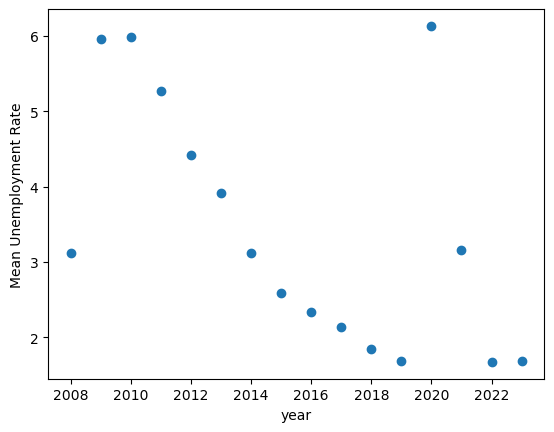

In [43]:
plt.scatter(dd.year,dd.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Mean Unemployment Rate')
plt.show()

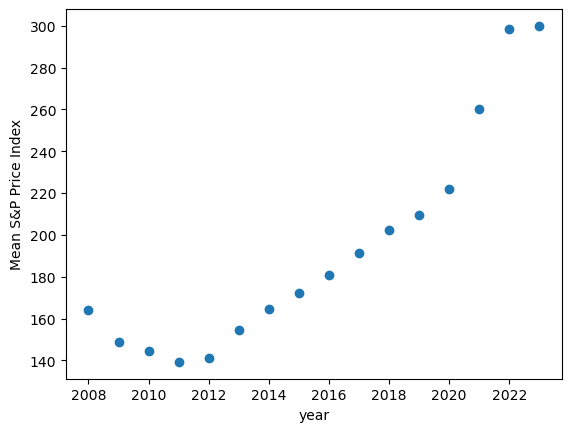

In [44]:
plt.scatter(dd.year,dd.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Mean S&P Price Index')
plt.show()

In [45]:
dMax=data.groupby(by='year', as_index=False).max()   # max values of each factors on the yearly basis
dMax

,year,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2008,2008-12-01,191.0,227.0,69.0,4.3,173.132
1,2009,2009-12-01,161.0,139.0,41.0,6.5,151.506
2,2010,2010-12-01,96.0,109.0,31.0,6.2,147.395
3,2011,2011-12-01,75.0,84.0,28.0,5.5,141.522
4,2012,2012-12-01,53.0,86.0,25.0,4.7,145.503
5,2013,2013-12-01,41.0,114.0,37.0,4.3,160.993
6,2014,2014-12-01,56.0,123.0,35.0,3.5,168.052
7,2015,2015-12-01,55.0,139.0,39.0,2.8,176.545
8,2016,2016-12-01,61.0,152.0,43.0,2.5,185.726
9,2017,2017-12-01,65.0,178.0,52.0,2.3,197.170


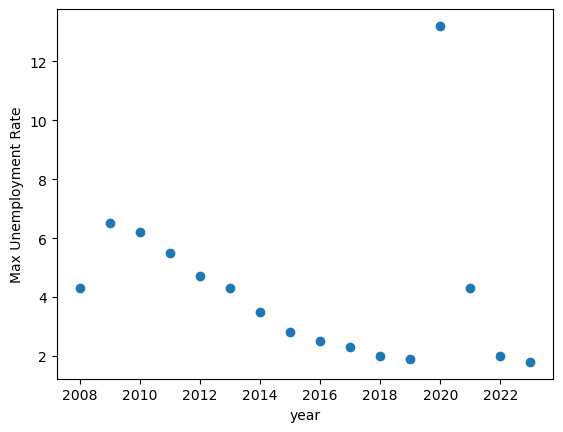

In [46]:
plt.scatter(dMax.year,dMax.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Max Unemployment Rate')
plt.show()

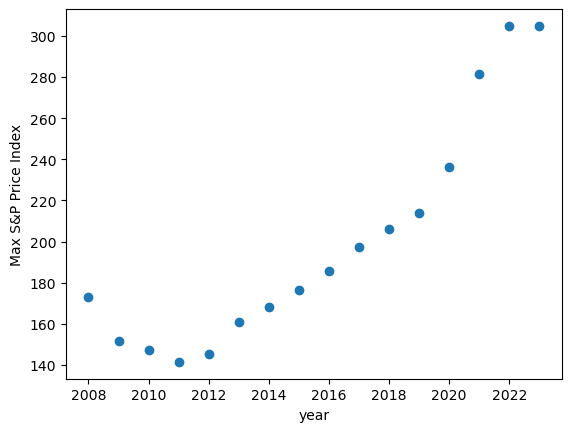

In [47]:
plt.scatter(dMax.year,dMax.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Max S&P Price Index')
plt.show()

In [48]:
dMin=data.groupby(by='year', as_index=False).min()  # min values of each factors on the yearly basis
dMin

,year,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2008,2008-01-01,166.0,145.0,42.0,2.5,153.618
1,2009,2009-01-01,96.0,106.0,29.0,4.8,147.695
2,2010,2010-01-01,77.0,86.0,26.0,5.7,142.061
3,2011,2011-01-01,56.0,70.0,23.0,4.9,136.675
4,2012,2012-01-01,40.0,71.0,22.0,4.2,136.533
5,2013,2013-01-01,37.0,87.0,22.0,3.5,146.827
6,2014,2014-01-01,43.0,112.0,29.0,2.8,161.927
7,2015,2015-01-01,48.0,112.0,36.0,2.4,168.634
8,2016,2016-01-01,55.0,139.0,36.0,2.2,177.272
9,2017,2017-01-01,59.0,153.0,45.0,2.0,186.800


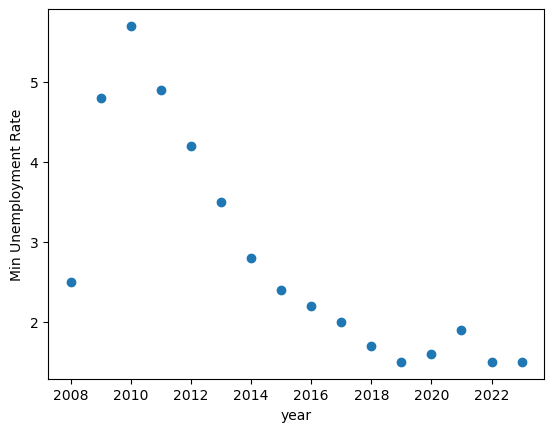

In [49]:
plt.scatter(dMin.year,dMin.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Min Unemployment Rate')
plt.show()

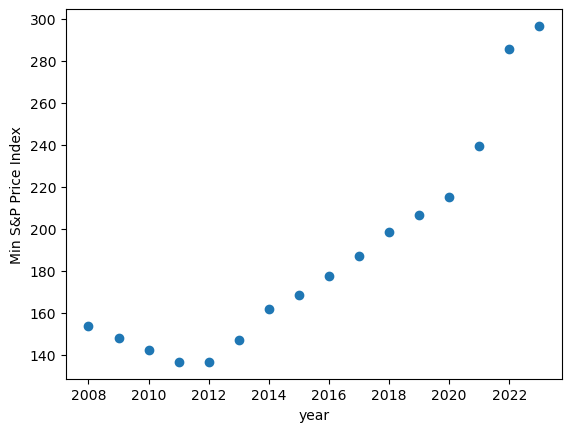

In [50]:
plt.scatter(dMin.year,dMin.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Min S&P Price Index')
plt.show()

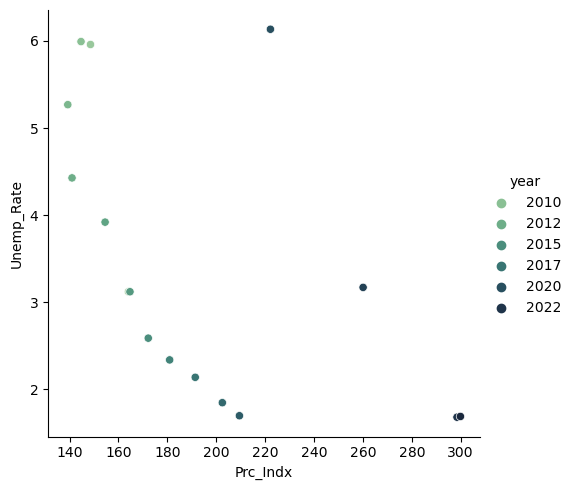

In [51]:
sns.relplot(x="Prc_Indx", y="Unemp_Rate", hue="year", palette="ch:r=-.5,l=.75", data=dd)

In [55]:
new=pd.read_csv('NHSUSSPT.csv')

In [56]:
new

,DATE,NHSUSSPT
0,2003-07-01,99
1,2003-08-01,105
2,2003-09-01,90
3,2003-10-01,88
4,2003-11-01,76
...,...,...
236,2023-03-01,62
237,2023-04-01,60
238,2023-05-01,66
239,2023-06-01,58


In [57]:
new.describe()

,NHSUSSPT
count,241.000000
mean,54.742739
std,24.591669
min,20.000000
25%,36.000000
50%,49.000000
75%,68.000000
max,127.000000


In [58]:
new['year']=  pd.DatetimeIndex(new['DATE']).year 

In [59]:
dd1=new.groupby(by='year',as_index=False).mean()

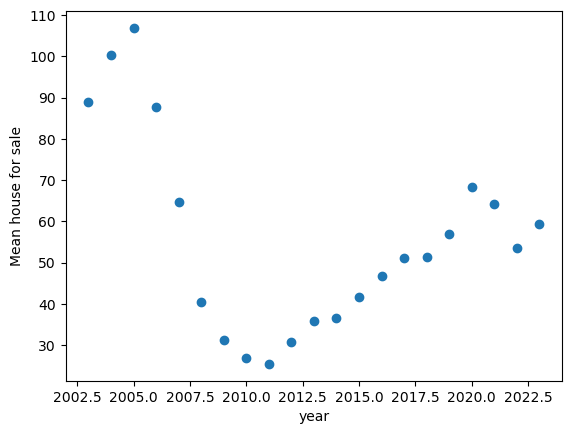

In [61]:
plt.scatter(dd1.year,dd1.NHSUSSPT)
plt.xlabel('year')
plt.ylabel('Mean house for sale')
plt.show()

In [62]:
dd1mx=new.groupby(by='year',as_index=False).max()
dd1mx

,year,DATE,NHSUSSPT
0,2003,2003-12-01,105
1,2004,2004-12-01,123
2,2005,2005-12-01,127
3,2006,2006-12-01,108
4,2007,2007-12-01,83
5,2008,2008-12-01,49
6,2009,2009-12-01,38
7,2010,2010-12-01,41
8,2011,2011-12-01,30
9,2012,2012-12-01,35


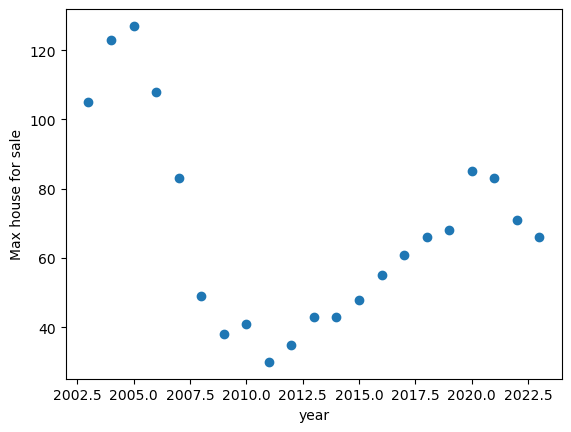

In [64]:
plt.scatter(dd1mx.year,dd1mx.NHSUSSPT)
plt.xlabel('year')
plt.ylabel('Max house for sale')
plt.show()

In [65]:
dd1mn=new.groupby(by='year',as_index=False).min()
dd1mn

,year,DATE,NHSUSSPT
0,2003,2003-07-01,75
1,2004,2004-01-01,83
2,2005,2005-01-01,86
3,2006,2006-01-01,71
4,2007,2007-01-01,44
5,2008,2008-01-01,26
6,2009,2009-01-01,24
7,2010,2010-01-01,20
8,2011,2011-01-01,21
9,2012,2012-01-01,23


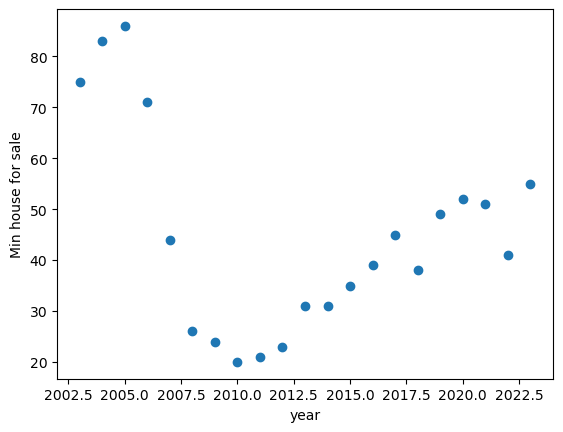

In [66]:
plt.scatter(dd1mn.year,dd1mn.NHSUSSPT)
plt.xlabel('year')
plt.ylabel('Min house for sale')
plt.show()

In [76]:
data.corr()

,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
Cnstr_Cmplt,1.000000,0.003282,-0.077862,0.160663,-0.291880,-0.574930
Undr_Cnstr,0.003282,1.000000,0.957621,-0.532878,0.933712,0.747836
Cnstr_Not_Strtd,-0.077862,0.957621,1.000000,-0.422310,0.952198,0.755626
Unemp_Rate,0.160663,-0.532878,-0.422310,1.000000,-0.456649,-0.465877
Prc_Indx,-0.291880,0.933712,0.952198,-0.456649,1.000000,0.889652
year,-0.574930,0.747836,0.755626,-0.465877,0.889652,1.000000


In [77]:
df=pd.merge(new,data,on='DATE',how ='inner')

In [78]:
df=df.drop(columns=['year_x','year_y','Cnstr_Cmplt','Undr_Cnstr','Cnstr_Not_Strtd'],axis=1)

In [79]:
df.rename(columns={'NHSUSSPT':'ttl_homes_avlbl_for_sale'},inplace=True)

In [80]:
df.drop(columns=['DATE'],axis=1,inplace=True)

In [81]:
df

,ttl_homes_avlbl_for_sale,Unemp_Rate,Prc_Indx
0,44,2.5,173.132
1,48,2.5,171.540
2,49,2.7,170.053
3,49,2.6,168.338
4,49,2.8,166.659
...,...,...,...
181,56,1.7,296.958
182,62,1.8,298.210
183,60,1.6,300.214
184,66,1.8,302.657


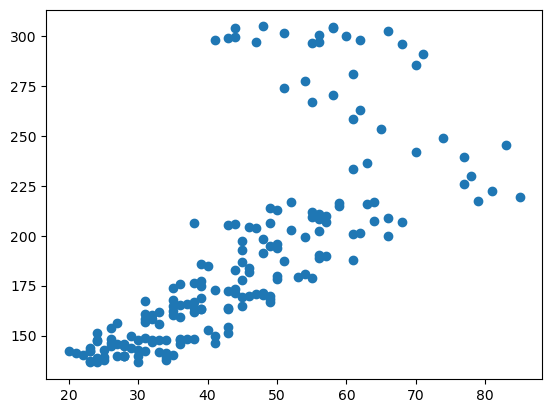

In [82]:
plt.scatter(df.ttl_homes_avlbl_for_sale,df.Prc_Indx)

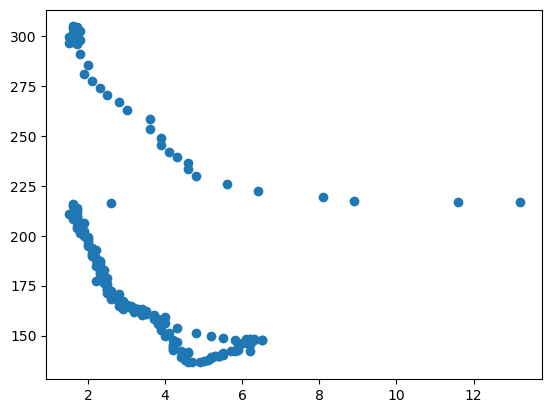

In [83]:
plt.scatter(df.Unemp_Rate,df.Prc_Indx)

# Model Building

In [84]:
X=df.drop(columns=['Prc_Indx'],axis=1)
Y=df['Prc_Indx']

In [85]:
from sklearn.model_selection import train_test_split
Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [87]:
lr=LinearRegression()

In [88]:
lr.fit(Xtr,Ytr)

LinearRegression()

In [89]:
yprd=lr.predict(Xts)

In [90]:
score=[]
for i in range(1000):
    Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(Xtr,Ytr)
    yprd=lr.predict(Xts)
    score.append(r2_score(Yts,yprd))

In [91]:
import numpy as np
np.argmax(score)

85

In [92]:
score[np.argmax(score)]

0.7650261688131329

In [93]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100,max_depth=9,random_state = 0)
regressor1.fit(Xtr, Ytr) 

RandomForestRegressor(max_depth=9, random_state=0)

In [94]:
Y_pred = regressor1.predict(Xts)

r2_score(Yts,Y_pred)

0.5121958128323872

In [95]:
scoree=[]
for i in range(1000):
    Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2,random_state=i)
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(Xtr, Ytr) 
    yprd=regressor.predict(Xts)
    scoree.append(r2_score(Yts,yprd))

In [96]:
np.argmax(scoree)

283

In [97]:
scoree[np.argmax(scoree)]

0.9400636665173727

## regressor model gives better prediction